In [1]:
import pandas as pd

# Load your data
trip_data = pd.read_excel('../data/Data_MNL_all.xlsx')  # Replace with your file path

# Check the frequency distribution of location_code
location_code_distribution = trip_data['location_code'].value_counts()

In [2]:
# Assuming you have the location_code_distribution from the previous step
location_code_distribution_df = location_code_distribution.reset_index()
location_code_distribution_df.columns = ['location_code', 'count']

location_code_distribution_df

,location_code,count
0,40,1955
1,39,1265
2,94,1137
3,93,1053
4,5,934
...,...,...
145,148,4
146,89,4
147,76,3
148,151,2


In [3]:
# Example: Saving DataFrame to a text file
location_code_distribution_df.to_csv('location_code_distribution.txt', index=False)

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Assuming 'trip_data' is your DataFrame and 'variables_to_remove' is the list of variables from Lasso
variables_to_remove = ['location_code']
trip_data_updated = trip_data.drop(columns=variables_to_remove)

# Assuming trip_data is your DataFrame and excluding non-numeric columns
X = trip_data_updated.select_dtypes(include=[np.number])
X = X.dropna()  # Drop rows with NaNs for VIF calculation

# Calculate VIF for each explanatory variable
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                Feature        VIF
0           bhv_app_map   5.449094
1               ind_age  21.098694
2        ind_fam_number  10.905097
3      ind_income_indiv   6.466739
4       bhv_online_hour  35.316987
5   bhv_longtime_driver  10.103682
6            loc_market   3.692903
7            loc_school   8.462034
8              loc_univ   3.269357
9          loc_bus_stop   4.111541
10          loc_station   1.224226
11         loc_terminal   2.854207
12           loc_hotels   5.508052
13             loc_mall   3.806115
14              loc_ofm  23.733996
15           loc_pickup  19.546159
16       loc_population  19.588349
17        loc_house_bld  12.660759
18            loc_parks   6.070843
19           loc_office   7.613600
20           loc_health   9.418862


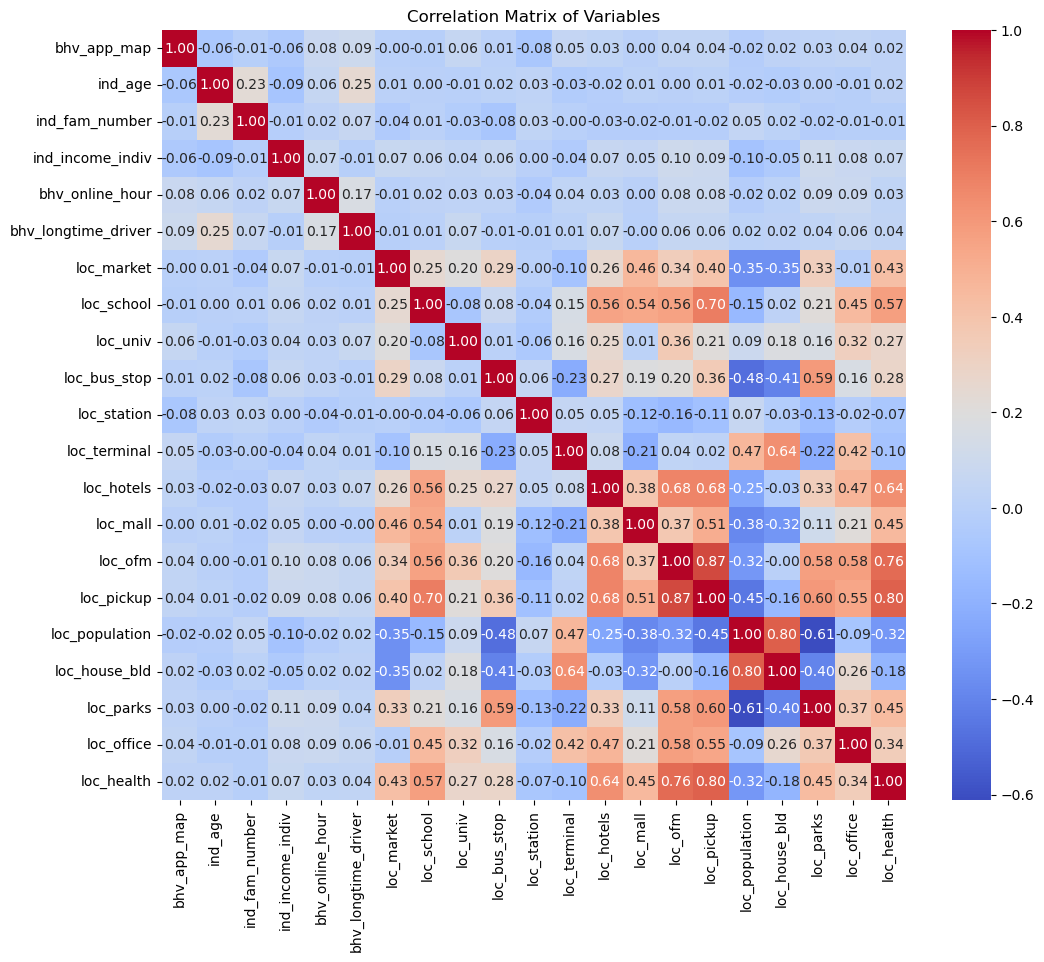

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming trip_data is your DataFrame

# Selecting numeric columns for correlation analysis
numeric_data = trip_data_updated.select_dtypes(include=[np.number])

# Calculating the correlation matrix
corr_matrix = numeric_data.corr()

# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Variables")
plt.show()

In [6]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Assuming 'trip_data' is your DataFrame and 'variables_to_remove' is the list of variables from Lasso
variables_to_remove = ['bhv_longtime_driver', 
                       'loc_pickup', 
                       'location_code', 
                       'bhv_online_hour', 
                       'ind_income_indiv', 
                       'loc_population',
                       'loc_ofm']  # Replace with actual variables to remove
trip_data_updated = trip_data.drop(columns=variables_to_remove)

# Recalculate VIF
X = trip_data_updated.select_dtypes(include=[np.number])
X = X.dropna()  # Drop rows with NaNs for VIF calculation

vif_data_updated = pd.DataFrame()
vif_data_updated['Feature'] = X.columns
vif_data_updated['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data_updated)

           Feature        VIF
0      bhv_app_map   4.734062
1          ind_age  13.151767
2   ind_fam_number   9.826220
3       loc_market   3.574639
4       loc_school   6.844242
5         loc_univ   3.113083
6     loc_bus_stop   3.476784
7      loc_station   1.204112
8     loc_terminal   2.619749
9       loc_hotels   4.855105
10        loc_mall   3.621144
11   loc_house_bld   5.376161
12       loc_parks   4.452064
13      loc_office   7.055598
14      loc_health   6.395930


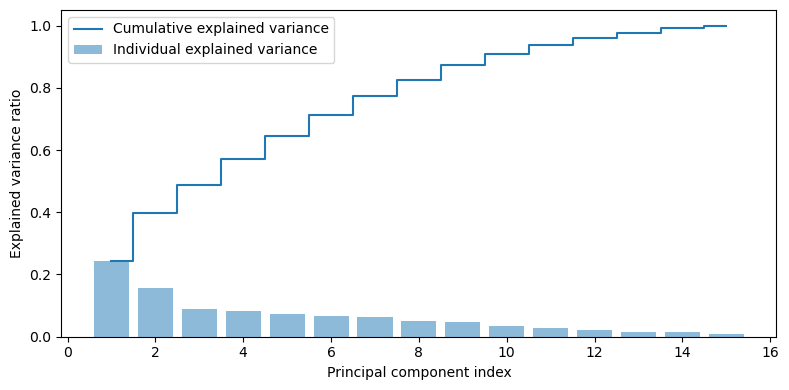

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assuming X is your dataset after VIF filtering

# Apply PCA without reducing dimensionality to compute full explained variance
pca = PCA()
pca.fit(X_scaled)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance for each component
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, 
        align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', 
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Decide the number of components (n) based on cumulative variance (e.g., 0.95)
n_components = np.argmax(cumulative_variance >= 0.95) + 1  # +1 because index starts at 0

In [8]:
n_components

12

In [9]:
# Assuming 'trip_data' is your DataFrame and 'variables_to_remove' is the list of variables from Lasso
variables_to_remove = ['bhv_longtime_driver', 
                       'loc_pickup',  
                       'bhv_online_hour', 
                       'ind_income_indiv', 
                       'loc_population',
                       'loc_ofm',
                       'bhv_other_platform',
                       'trip_order_Food',
                       'trip_order_delivery',
                       'trip_order_Ride'
                       ]  # Replace with actual variables to remove
trip_data_updated = trip_data.drop(columns=variables_to_remove)

In [10]:
from sklearn.model_selection import train_test_split

X = trip_data_updated.drop(['driver_id','location_code'], axis=1)  # Features
y = trip_data_updated['location_code']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
trip_data_updated.columns

Index(['driver_id', 'bhv_app_map', 'ind_age', 'ind_fam_number', 'loc_market',
       'loc_school', 'loc_univ', 'loc_bus_stop', 'loc_station', 'loc_terminal',
       'loc_hotels', 'loc_mall', 'loc_house_bld', 'loc_parks', 'loc_office',
       'loc_health', 'location_code'],
      dtype='object')

In [12]:
# Choose a threshold for minimum number of samples per class
# This threshold is just an example, and should be adjusted based on specific needs
threshold = 50  # For instance, any class with less than 50 samples will be removed

# Identify classes below the threshold
small_classes = y_train.value_counts()[y_train.value_counts() < threshold]
small_classes_list = small_classes.index.tolist()

# Filter out these classes from the dataset
filtered_data = trip_data_updated[~trip_data_updated['location_code'].isin(small_classes_list)]

# Show the impact of this filtering
original_shape = trip_data_updated.shape
filtered_shape = filtered_data.shape
removed_classes_count = len(small_classes_list)

original_shape, filtered_shape, removed_classes_count

((24416, 17), (22892, 17), 60)

In [13]:
filtered_data

,driver_id,bhv_app_map,ind_age,ind_fam_number,loc_market,loc_school,loc_univ,loc_bus_stop,loc_station,loc_terminal,loc_hotels,loc_mall,loc_house_bld,loc_parks,loc_office,loc_health,location_code
0,ikialink8@gmail.com,3,34,4,1,7,0,0,0,0,5,1,1014,0,6,2,145
1,ikialink8@gmail.com,3,34,4,1,7,0,3,0,1,6,0,1328,0,4,0,133
2,ikialink8@gmail.com,3,34,4,0,11,4,3,0,0,14,0,1419,0,15,1,111
3,ikialink8@gmail.com,3,34,4,0,5,2,2,0,0,14,0,2186,1,10,3,86
4,ikialink8@gmail.com,3,34,4,1,9,0,0,0,0,6,0,2232,0,2,1,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24411,82115300676.0,2,37,4,1,32,1,2,0,0,21,1,829,3,18,6,40
24412,895402000000.0,1,52,4,0,10,1,0,0,0,1,0,5928,0,7,1,102
24413,895402000000.0,1,52,4,1,0,2,0,0,0,0,0,2983,0,1,2,103
24414,895402000000.0,1,52,4,0,19,0,0,0,0,0,0,2198,0,9,4,14


In [14]:
from imblearn.over_sampling import SMOTE
# Split the filtered dataset into training and test sets
X_filtered = filtered_data.drop(['driver_id','location_code'], axis=1)
y_filtered = filtered_data['location_code']

# # Encoding binary variables in the filtered dataset
# X_filtered['bhv_other_platform'] = X_filtered['bhv_other_platform'].astype(int)
# X_filtered['trip_order_Food'] = X_filtered['trip_order_Food'].astype(int)
# X_filtered['trip_order_delivery'] = X_filtered['trip_order_delivery'].astype(int)
# X_filtered['trip_order_Ride'] = X_filtered['trip_order_Ride'].astype(int)

# Split the dataset
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=42
)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_filtered, y_train_filtered)

# Check the new class distribution
new_distribution_filtered = y_train_smote.value_counts()

new_distribution_filtered.head(), new_distribution_filtered.tail()  # Display the head and tail of the new distribution

(location_code
 128    1565
 72     1565
 130    1565
 47     1565
 127    1565
 Name: count, dtype: int64,
 location_code
 143    1565
 27     1565
 135    1565
 84     1565
 115    1565
 Name: count, dtype: int64)

In [15]:
y_train_smote

0         128
1          40
2          70
3          94
4         128
         ... 
140845    146
140846    146
140847    146
140848    146
140849    146
Name: location_code, Length: 140850, dtype: int64

In [16]:
X_train_smote

,bhv_app_map,ind_age,ind_fam_number,loc_market,loc_school,loc_univ,loc_bus_stop,loc_station,loc_terminal,loc_hotels,loc_mall,loc_house_bld,loc_parks,loc_office,loc_health
0,4,28,4,1,23,0,4,0,0,6,1,438,1,7,1
1,5,45,4,1,32,1,2,0,0,21,1,829,3,18,6
2,1,44,4,0,4,2,0,0,0,0,0,2461,0,5,1
3,4,44,6,1,1,3,4,0,0,9,0,1105,2,5,4
4,2,27,2,1,23,0,4,0,0,6,1,438,1,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140845,3,41,4,0,9,2,1,0,0,6,0,1104,3,12,0
140846,1,40,4,0,9,2,1,0,0,6,0,1104,3,12,0
140847,5,34,4,0,9,2,1,0,0,6,0,1104,3,12,0
140848,4,27,6,0,9,2,1,0,0,6,0,1104,3,12,0


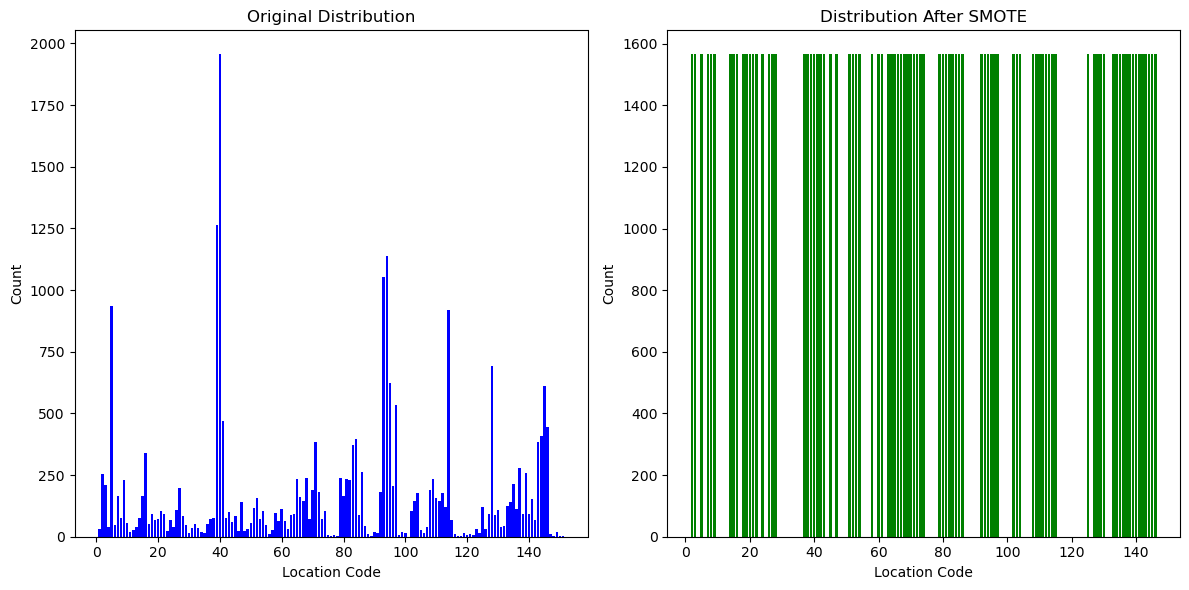

In [17]:
import matplotlib.pyplot as plt

# Assuming 'original_distribution' and 'smote_distribution' are Series with location_code counts
original_distribution = trip_data['location_code'].value_counts()
smote_distribution = y_train_smote.value_counts()  # After SMOTE

# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Original Distribution
axes[0].bar(original_distribution.index, original_distribution.values, color='blue')
axes[0].set_title('Original Distribution')
axes[0].set_xlabel('Location Code')
axes[0].set_ylabel('Count')

# Distribution After SMOTE
axes[1].bar(smote_distribution.index, smote_distribution.values, color='green')
axes[1].set_title('Distribution After SMOTE')
axes[1].set_xlabel('Location Code')
axes[1].set_ylabel('Count')

# Display the plots
plt.tight_layout()
plt.show()

In [18]:
import statsmodels.api as sm

# Assuming X_train_smote and y_train_smote are your training data after applying SMOTE
X_train_sm = sm.add_constant(X_train_smote)  # Adding a constant for the intercept
model = sm.MNLogit(y_train_smote, X_train_sm)
result = model.fit()

# Model summary
print(result.summary())

/home/superapp-research/anaconda3/envs/suapp/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3025: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
/home/superapp-research/anaconda3/envs/suapp/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3026: RuntimeWarning: invalid value encountered in divide
  return eXB/eXB.sum(1)[:,None]


Optimization terminated successfully.
         Current function value: nan
         Iterations 4
                          MNLogit Regression Results                          
Dep. Variable:          location_code   No. Observations:               140850
Model:                        MNLogit   Df Residuals:                   139426
Method:                           MLE   Df Model:                         1335
Date:                Mon, 27 Nov 2023   Pseudo R-squ.:                     nan
Time:                        11:01:50   Log-Likelihood:                    nan
converged:                       True   LL-Null:                   -6.3380e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
  location_code=3       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                    nan        nan        nan        nan         nan         nan
bhv_app_map  